# Global Inflation 

This notebook delves into the comprehensive global inflation dataset hosted on [Kaggle](https://www.kaggle.com/datasets/sazidthe1/global-inflation-data/data), originally derived from the [World Bank's website](https://data.worldbank.org/). Featuring annual average inflation rates for 197 countries from 1980 to the current day, the dataset provides a rich basis for analysis.

In [66]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [75]:
df = pd.read_csv("../data/global_inflation_data.csv")

In [68]:
mask = df["country_name"].str.contains("bahrain", case=False, na=False)
matching = df.loc[mask]
matching

,country_name,indicator_name,1980,1981,1982,1983,1984,1985,1986,1987,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
13,Bahrain,Annual average inflation (consumer prices) rate,3.8,11.4,8.7,3.2,0.0,-2.4,-2.5,-1.7,...,1.8,2.8,1.4,2.1,1.0,-2.3,-0.6,3.6,1.0,1.4


In [69]:
gcc_countries = ["Saudi Arabia", "United Arab Emirates", "Qatar", "Kuwait", "Oman", "Bahrain"]

In [70]:
# Wanted to look at US and UK inflation specifically - made two new datasets and tranposed so they could be used for plots easier

uk_inf = df[df['country_name'] == 'United Kingdom']
ksa_inf = df[df['country_name'] == 'Saudi Arabia']

uk_data = uk_inf.drop(columns=['country_name', 'indicator_name'])
ksa_data = ksa_inf.drop(columns=['country_name', 'indicator_name'])

# Transpose the dataframe
uk_data = uk_data.transpose().reset_index()
ksa_data = ksa_data.transpose().reset_index()

# uk_data.to_csv('US_inflation.csv')
# Rename the columns
uk_data.columns = ['Year', 'Inflation']
ksa_data.columns = ['Year', 'Inflation']

# Convert the 'Year' column to integer type
uk_data['Year'] = uk_data['Year'].astype(int)
ksa_data['Year'] = ksa_data['Year'].astype(int)

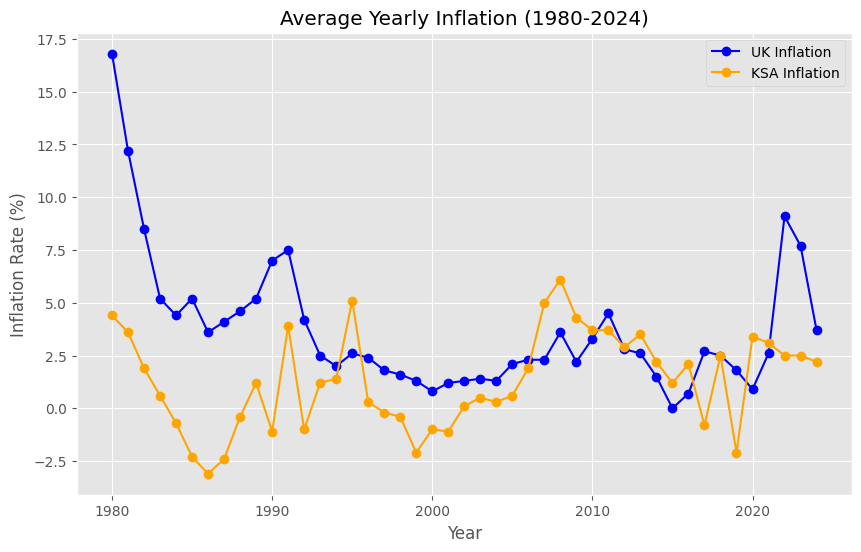

In [71]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(uk_data['Year'], uk_data['Inflation'], marker='o', color='blue', label='UK Inflation')
plt.plot(ksa_data['Year'], ksa_data['Inflation'], marker='o', color='orange', label='KSA Inflation')
plt.title('Average Yearly Inflation (1980-2024)')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.legend(loc='best')
plt.grid(True)

plt.show()

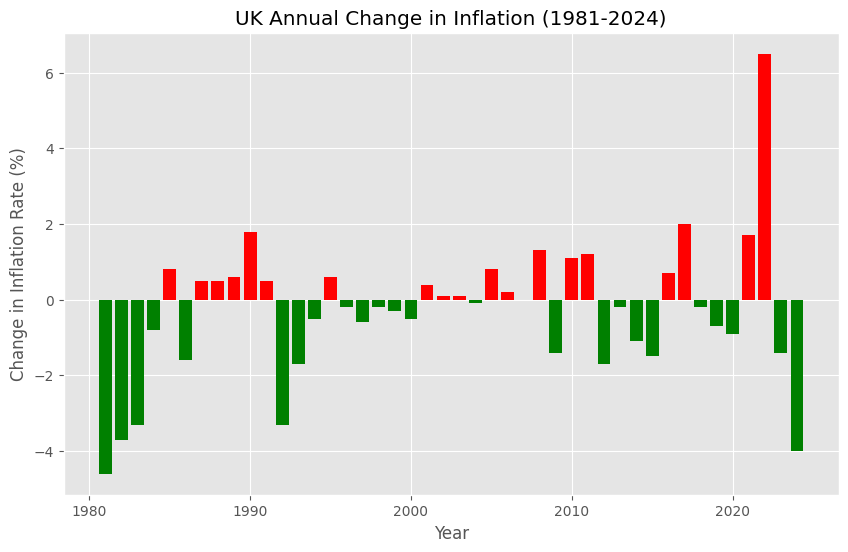

In [72]:
# Also want to look at a year-on-year change in inflation for each country:

uk_data['Inflation Change'] = uk_data['Inflation'].diff()

# Drop the first row with NaN value
uk_data = uk_data.dropna()

# Determine bar colors based on positive or negative change
colors = ['red' if x > 0 else 'green' for x in uk_data['Inflation Change']]

# Plot the annual change in inflation as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(uk_data['Year'], uk_data['Inflation Change'], color=colors)
plt.title('UK Annual Change in Inflation (1981-2024)')
plt.xlabel('Year')
plt.ylabel('Change in Inflation Rate (%)')
plt.grid(True)
plt.show()

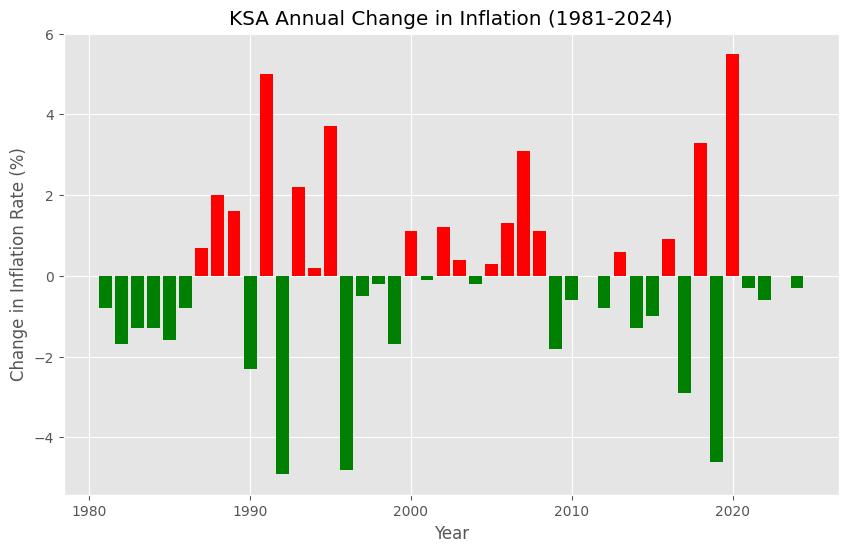

In [73]:
# Also want to look at a year-on-year change in inflation for each country:

ksa_data['Inflation Change'] = ksa_data['Inflation'].diff()

# Drop the first row with NaN value
ksa_data = ksa_data.dropna()

# Determine bar colors based on positive or negative change
colors = ['red' if x > 0 else 'green' for x in ksa_data['Inflation Change']]

# Plot the annual change in inflation as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(ksa_data['Year'], ksa_data['Inflation Change'], color=colors)
plt.title('KSA Annual Change in Inflation (1981-2024)')
plt.xlabel('Year')
plt.ylabel('Change in Inflation Rate (%)')
plt.grid(True)
plt.show()

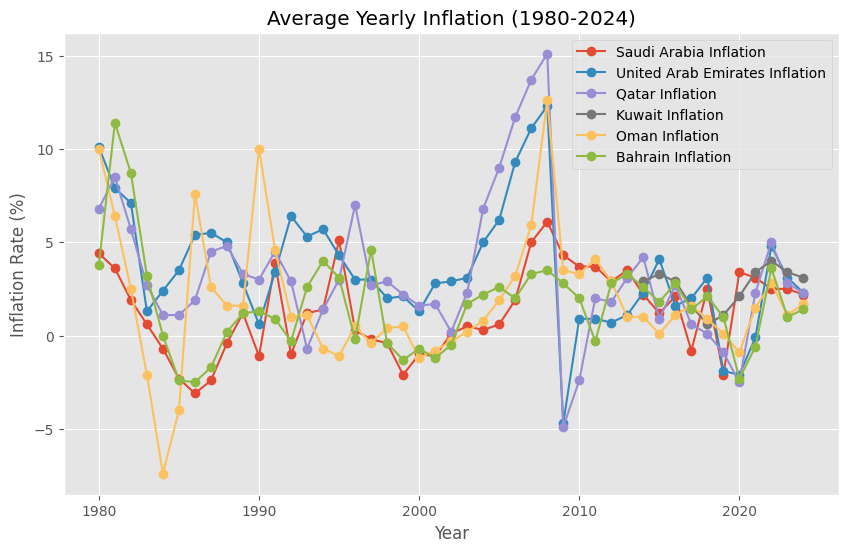

In [74]:

plt.figure(figsize=(10, 6))

# Wanted to look at US and UK inflation specifically - made two new datasets and tranposed so they could be used for plots easier

for gcc_name in gcc_countries:

    inf = df[df['country_name'] == gcc_name] 

    data = inf.drop(columns=['country_name', 'indicator_name']) 

    # Transpose the dataframe
    data = data.transpose().reset_index() 

    # uk_data.to_csv('US_inflation.csv')
    # Rename the columns
    data.columns = ['Year', 'Inflation'] 

    # Convert the 'Year' column to integer type
    data['Year'] = data['Year'].astype(int) 

    plt.plot(data['Year'], data['Inflation'], marker='o', label=f'{gcc_name} Inflation')
    
plt.title('Average Yearly Inflation (1980-2024)')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.legend(loc='best')
plt.grid(True)